# Preparación de los Corpus.
## Eliminación de cabeceras.
Para comenzar con la tarea, es necesario eliminar las cabeceras presentes en cada uno de los corpus, ya que no son relevantes para la generación de nuestros modelos. A continuación, se muestra una imagen en la que se destaca en rojo el formato de la cabecera de uno de los corpus.


<div style="text-align:center;">
    <img src="./images/image_1.png" alt="Descripción de la imagen" width="600">
</div>


Para comenzar a trabajar en este proceso, primero declararemos una variable llamada CORPUS_MODIFICATION_DONE, que nos permitirá garantizar no sobresciribir sobre los ficheros que ya han sido tratados. Sin esta variable, los archivos de los corpus se sobrescribirían constantemente, pero solo necesitamos hacerlo una vez.

Si es la primera vez que se ejecuta este proyecto y las cabeceras aún no han sido eliminadas, se debe establecer el valor de la variable a False.

In [2]:
CORPUS_MODIFICATION_DONE = True

Para comenzar a trabajar con los corpus, es necesario entender la estructura que presentan. En este caso, podemos observar que existen 8 directorios, cada uno de los cuales contiene múltiples archivos. Por lo tanto, debemos recorrer tanto los directorios como los archivos que contienen.

<div style="text-align:center;">
    <img src="./images/image_2.png" alt="Descripción de la imagen" width="600">
</div>


A continuación, utilizaremos la librería de Python os, que permite ejecutar comandos en el sistema operativo. Para ello, nos ubicaremos en el directorio /Corpus-representacion y ejecutaremos el comando 'ls' (listar directorios), lo que nos permitirá obtener todos los directorios dentro de Corpus-representacion.

In [3]:
import os
path = os.getcwd() + "/Corpus-representacion"
# Obtener el listado
listado = os.listdir(path)

corpus_dir = [] # Guardamos el directorio para cada fichero
for elemento in listado:
    corpus_dir.append(path +'/'+elemento)

In [4]:
def read_file_without_header(filename):
    with open(filename, "r") as archivo:
        lineas = archivo.readlines()
        start_read_file = False
        text_without_header = ""
        for linea in lineas:
            if linea.startswith("Lines:"):
                start_read_file = True
                continue
            if start_read_file:
                text_without_header += linea.strip()
        return text_without_header

def write_file(filename, text):
    """
    Escribe texto en un fichero, sobrescribiendo su contenido existente.
    Si el fichero no existe, lo crea.

    Args:
        filename (str): Nombre del fichero.
        text (str): Texto a escribir en el fichero.
    """
    try:
        with open(filename, 'w') as file:  # 'w' mode sobrescribe el contenido
            file.write(text)  # Escribe el texto proporcionado
        print(f"Texto sobrescrito correctamente en {filename}.")
    except Exception as e:
        print(f"Error al escribir en el fichero: {e}")


In [5]:
all_corpus_files = []
for dir in corpus_dir:
    corpus_files = os.listdir(dir)
    for corpus in corpus_files:
        all_corpus_files.append(dir +'/'+corpus)

In [6]:
if not CORPUS_MODIFICATION_DONE:
    for corpus in all_corpus_files:
        text_without_header = read_file_without_header(dir +'/'+corpus)
        write_file(dir +'/'+corpus, text_without_header)

Hay un único archivo que parecía estar mal configurado, identificado como 101596 de rec.autos. En la fotografía se observa que incluso el propio editor de código no logra identificar el error exacto, por lo que los caracteres especiales se han eliminado manualmente.


![Descripción de la imagen](./images/image.png)

# Tokenizacion

In [7]:
import re
import nltk
from nltk.tokenize import word_tokenize

words = []
for corpus in all_corpus_files:
    f = open(corpus)
    raw = f.read()
    # make all words to lowercase and remove specials characters
    raw = re.sub(r'[^\w\s]', '', raw.lower())

    all_file = word_tokenize(raw)
    for word in all_file:
        words.append(word)
    words.append('@@@')

print(len(words))
# print(words[0:5])
print(words[1420:1450])


194669
['you', 'go', 'there', 'you', 'arevktargatan', '32', 'f621', '754', '22', 'uppsala', 'sweden', '@@@', 'in', 'article', '1993apr520280027705wamumdedu', 'spinozanext06worwamumdedu', 'yon', 'bonnie', 'laird', 'of', 'cairn', 'robbing', 'writes', 'in', 'article', 'c50wjjj4rnewsflashconcordiaca', 'ilyessececoncordiaca', 'ilyess', 'bdira', 'writes']


In [8]:
# remove all words that contain a number
bag_of_words = [word for word in words if not re.search(r'\d', word)]
bag_of_words[0:5]

# count = 0 
# for word in bag_of_words:
#     count +=1
#     if word == '@@@':
#         print(count)

['messageid',
 'frejteknikumuuseinreplyto',
 'hasanmcrcimmcgilledu',
 's',
 'message']

In [9]:
# Filtrar palabras según la longitud
bag_of_words = [word for word in bag_of_words if 2 <= len(word) <= 15]
bag_of_words[0:5]

['messageid', 'message', 'of', 'mon', 'apr']

In [10]:
from nltk.corpus import words as nltk_words
nltk.download('words')

valid_words = set(nltk_words.words())
bag_of_words = [word for word in bag_of_words if word in valid_words or word == '@@@']
bag_of_words[0:5]


[nltk_data] Downloading package words to
[nltk_data]     /Users/maciasalvasalva/nltk_data...
[nltk_data]   Package words is already up-to-date!


['message', 'of', 'mon', 'article', 'stuff']

In [11]:
len(bag_of_words)

134625

# Stop-Words

In [12]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
# numeros, caracteres especiales, palabras que no existen, etc..

filtered_bag_of_words = []
for word in bag_of_words:
    if word not in stop_words:
        filtered_bag_of_words.append(word)

print(filtered_bag_of_words[10:50])
print(len(filtered_bag_of_words))

['paragraph', 'accept', 'title', 'order', 'let', 'get', 'um', 'well', 'debate', 'know', 'master', 'wisdom', 'name', 'consider', 'deserveless', 'unless', 'someone', 'else', 'fact', 'given', 'ask', 'hence', 'term', 'name', 'expect', 'tell', 'tell', 'master', 'insist', 'giving', 'ask', 'could', 'least', 'spell', 'correctly', 'confuse', 'ha', 'ha', 'ha', 'hey']
62703


# Lematizacion

In [13]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('pos_tag')

# Función para mapear tipos gramaticales
def get_wordnet_pos(word):
    from nltk.corpus import wordnet
    from nltk import pos_tag
    
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Inicializamos el lematizador
lemmatizer = WordNetLemmatizer()

# Aplicamos la lematización considerando el tipo gramatical
final_bag_of_words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in filtered_bag_of_words]

print(final_bag_of_words)


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/maciasalvasalva/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/maciasalvasalva/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Error loading pos_tag: Package 'pos_tag' not found in
[nltk_data]     index


['message', 'mon', 'article', 'stuff', 'write', 'call', 'give', 'title', 'first', 'read', 'paragraph', 'accept', 'title', 'order', 'let', 'get', 'um', 'well', 'debate', 'know', 'master', 'wisdom', 'name', 'consider', 'deserveless', 'unless', 'someone', 'else', 'fact', 'give', 'ask', 'hence', 'term', 'name', 'expect', 'tell', 'tell', 'master', 'insist', 'give', 'ask', 'could', 'least', 'spell', 'correctly', 'confuse', 'ha', 'ha', 'ha', 'hey', 'retard', 'childhood', 'nowhen', 'intentionally', 'important', 'fact', 'whole', 'presence', 'hence', 'illegitimate', 'ground', 'merely', 'whether', 'try', 'retaliate', 'confuse', 'really', 'try', 'spell', 'correctly', 'apologize', 'confuse', 'try', 'repeat', 'live', 'eloquently', 'put', 'human', 'right', 'get', 'back', 'question', 'law', 'use', 'later', 'also', 'question', 'also', 'human', 'statement', 'say', 'existence', 'revoke', 'right', 'life', 'revoke', 'right', 'life', 'right', 'military', 'men', 'clearly', 'occupation', 'war', 'war', 'milita

# Funciones de pesado TF y TF-IDF

In [14]:
# Inicializar lista para documentos
documents = []
current_document = []

# Procesar cada palabra en final_bag_of_words
for word in final_bag_of_words:
    if word == '@@@':  # Delimitador encontrado, agregar documento a la lista
        documents.append(" ".join(current_document))  # Unir palabras en una cadena
        current_document = []  # Reiniciar el documento
    else:
        current_document.append(word)

# Agregar el último documento si no termina en '@@@'
if current_document:
    documents.append(" ".join(current_document))

print("Lista de documentos:")
print("Documents: ", len(documents)," Corpus files: ", len(all_corpus_files))


Lista de documentos:
Documents:  805  Corpus files:  805


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Supongamos que tienes una lista de documentos donde cada documento es una cadena de texto
# corpus = [" ".join(final_bag_of_words)]  # Reemplaza con tus documentos

# Vectorizador para calcular TF
tf_vectorizer = CountVectorizer()
tf_matrix = tf_vectorizer.fit_transform(documents)

# Vectorizador para calcular TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Obtener las matrices TF y TF-IDF
print("TF Matrix Shape:", tf_matrix.shape)
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

# Convertir a DataFrame para inspección (opcional)
# import pandas as pd

# tf_df = pd.DataFrame(tf_matrix.toarray(), columns=tf_vectorizer.get_feature_names_out())
# tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# print("TF DataFrame:")
# print(tf_df.head())

# print("TF-IDF DataFrame:")
# print(tfidf_df.head())


TF Matrix Shape: (805, 6151)
TF-IDF Matrix Shape: (805, 6151)


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import json
import numpy as np

# Paso 1: Cargar y preprocesar los documentos
# documents = [
#     "Este es el primer documento.",
#     "Este documento es el segundo.",
#     "Y este es el tercero y último documento."
# ]

# Preprocesamiento básico
preprocessed_docs = [doc.lower().split() for doc in documents]

# Paso 2: Generar representaciones
# Representación 1: TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([' '.join(doc) for doc in preprocessed_docs])

# Representación 2: Word2Vec
w2v_model = Word2Vec(preprocessed_docs, vector_size=100, window=5, min_count=1, workers=4)
word2vec_vectors = {word: w2v_model.wv[word].tolist() for word in w2v_model.wv.index_to_key}

# Paso 3: Almacenar las representaciones
# Guardar TF-IDF
tfidf_file = "representaciones/tfidf_representation.json"
with open(tfidf_file, 'w') as file:
    json.dump(tfidf_matrix.toarray().tolist(), file)

# Guardar Word2Vec
w2v_file = "representaciones/word2vec_representation.json"
with open(w2v_file, 'w') as file:
    json.dump(word2vec_vectors, file)

print(f"TF-IDF guardado en {tfidf_file}")
print(f"Word2Vec guardado en {w2v_file}")


TF-IDF guardado en representaciones/tfidf_representation.json
Word2Vec guardado en representaciones/word2vec_representation.json


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


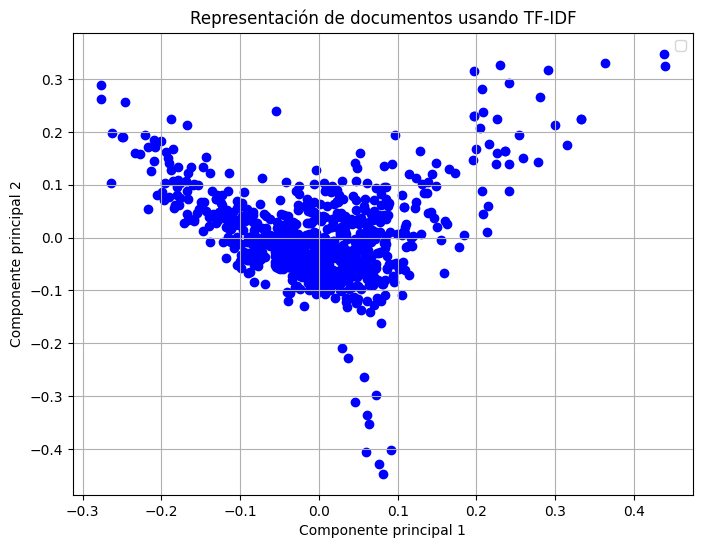

In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reducir dimensiones de la matriz TF-IDF a 2D
pca = PCA(n_components=2)
tfidf_2d = pca.fit_transform(tfidf_matrix.toarray())

# Graficar los documentos en el espacio reducido
plt.figure(figsize=(8, 6))
for  coord in tfidf_2d:
    plt.scatter(coord[0], coord[1], color='blue')

plt.title("Representación de documentos usando TF-IDF")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend()
plt.grid()
plt.show()


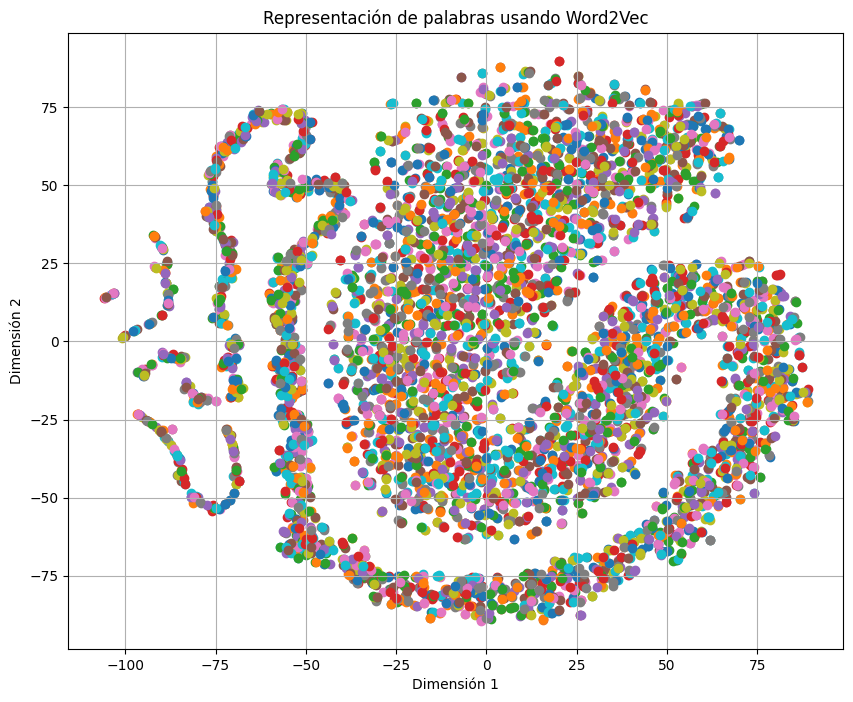

In [18]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Convertir los vectores Word2Vec a un array de NumPy
word_vectors = np.array(list(word2vec_vectors.values()))

# Reducir dimensiones de los vectores Word2Vec a 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
w2v_2d = tsne.fit_transform(word_vectors)

# Graficar las palabras en el espacio reducido
plt.figure(figsize=(10, 8))
for i, word in enumerate(word2vec_vectors.keys()):
    plt.scatter(w2v_2d[i, 0], w2v_2d[i, 1])

plt.title("Representación de palabras usando Word2Vec")
plt.xlabel("Dimensión 1")
plt.ylabel("Dimensión 2")
plt.grid()
plt.show()
